# <b>AASD 4015 - Advance Mathematical Concepts for Deep Learning Group Project 2</b>

<b>Members:</b> 
1. Saksham Prakash (101410709) 
2. Sik Yin Sun (101409665)

## Background and Motivation

## <b> 1. Installing and Importing libraries </b>
<a id='lib'></a>

In [124]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

## <b>2. Data - Chest X-Ray Images (Pneumonia)</b>
<font size=3>The link of Data:</font>
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [125]:
train_dir = "../chest_xray/train"
val_dir = "../chest_xray/val"
test_dir = "../chest_xray/test"

In [126]:
img_height = 320
img_width = 320
batch_size = 16

In [140]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(img_height, img_width), batch_size = batch_size, shuffle = True)
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir, image_size=(img_height, img_width), batch_size = batch_size, shuffle = True)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(img_height, img_width), batch_size = batch_size, shuffle = True)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [155]:
class_label = train_data.class_names
class_label

['NORMAL', 'PNEUMONIA']

In [146]:
train_num = []
val_num = []
test_num = []
print("Train Data")
for i in class_label:
    num_files = len(os.listdir(os.path.join(train_dir, i)))
    train_num.append(num_files)
    print(f"{i}: {num_files} files")

print("\nValidation Data")
for i in class_label:
    num_files = len(os.listdir(os.path.join(val_dir, i)))
    val_num.append(num_files)
    print(f"{i}: {num_files} files")

print("\nTest Data")
for i in class_label:
    num_files = len(os.listdir(os.path.join(test_dir, i)))
    test_num.append(num_files)
    print(f"{i}: {num_files} files")

Train Data
NORMAL: 1341 files
PNEUMONIA: 3875 files

Validation Data
NORMAL: 8 files
PNEUMONIA: 8 files

Test Data
NORMAL: 234 files
PNEUMONIA: 390 files


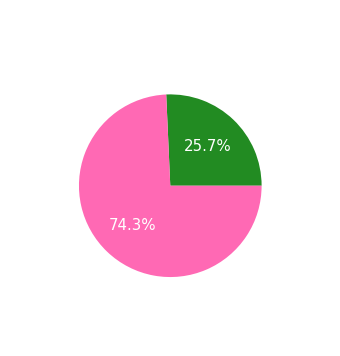

In [151]:
colors = ['#228b22', '#ff69b4']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(train_num, labels=train_data.class_names, autopct='%1.1f%%', colors = colors, textprops={'color': 'white', 'fontsize': 15}, radius=0.7, center=(0.5, 0.5))
ax.set_title('Distribution of Images Across Classes for Train Data', color="white")
plt.show()

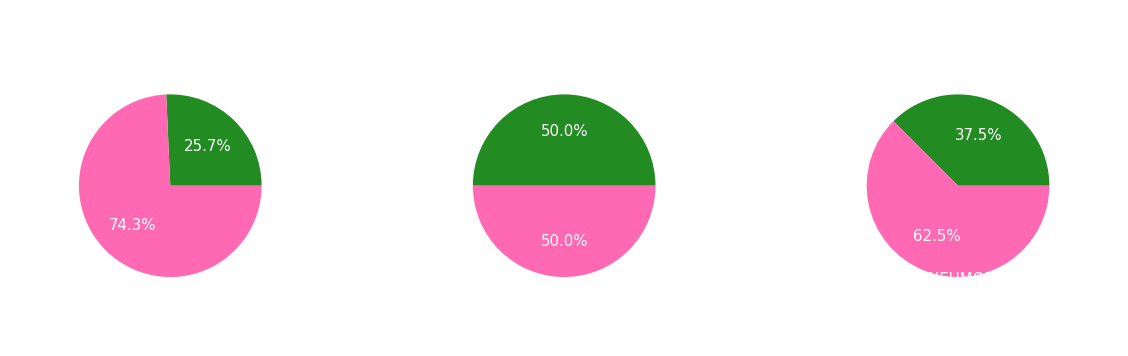

In [161]:
colors = ['#228b22', '#ff69b4']
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))
axs[0].pie(train_num, labels=class_label, autopct='%1.1f%%', colors = colors, textprops={'color': 'white', 'fontsize': 15}, radius=0.7, center=(0.5, 0.5))
axs[0].set_title('Distribution of Images Across Classes for Train Data', color="white")
axs[1].pie(val_num, labels=class_label, autopct='%1.1f%%', colors = colors, textprops={'color': 'white', 'fontsize': 15}, radius=0.7, center=(0.5, 0.5))
axs[1].set_title('Distribution of Images Across Classes for Validation Data', color="white")
axs[2].pie(test_num, labels=class_label, autopct='%1.1f%%', colors = colors, textprops={'color': 'white', 'fontsize': 15}, radius=0.7, center=(0.5, 0.5))
axs[2].set_title('Distribution of Images Across Classes for Test Data', color="white")
plt.show()

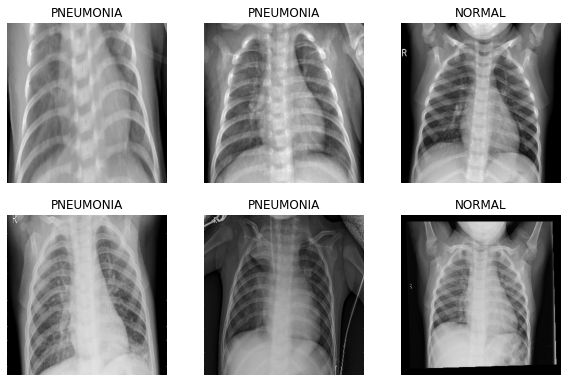

In [162]:
plt.figure(figsize = (10,10))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_label[labels[i]])
    plt.axis('off')

<font size=3>After briefly exploring the data, we found out that there is a vast difference between "normal" and "pneumonia" for the train data. Additionally, we found that there is more pneumonia record than normal. From the image above, we can see them for people with pneumonia. Their X-ray pictures are much blurry than normal people, and we believe that is because the lung infection causes some fluid there.</font>

## <b> 3.1 VGG </b>